In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load the input image
img_path = r"../image1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not load {img_path}")


In [3]:
# 2. Generic convolution function
def apply_filter(image, kernel):
    """
    Apply a linear spatial filter via convolution.
    - image: single‐channel (grayscale) uint8 image
    - kernel: 2D numpy array of floats
    Returns a filtered uint8 image.
    """
    return cv2.filter2D(image, ddepth=-1, kernel=kernel)

In [4]:
# 3. Define common linear filters
# 3×3 Average (Box) Filter
k_mean3 = np.ones((3,3), np.float32) / 9

# 5×5 Gaussian Filter (σ=1)
g = cv2.getGaussianKernel(5, 1)           # 5×1
k_gauss5 = g @ g.T                        # outer product → 5×5

# 3×3 Laplacian Filter (2nd‐derivative high‐pass)
k_laplace3 = np.array([[0,  1, 0],
                       [1, -4, 1],
                       [0,  1, 0]], np.float32)

# 3×3 High‐boost Filter (enhanced sharpening)
#    = (1 + k)*δ  - k * average
# here we choose boost k=1 ⇒ kernel = δ + (δ − mean3)
k_highboost = np.array([[0, -1,  0],
                        [-1, 5, -1],
                        [0, -1,  0]], np.float32)

# 3×3 Prewitt X & Y
k_prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]], np.float32)
k_prewitt_y = k_prewitt_x.T

# 3×3 Sobel X & Y
k_sobel_x = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]], np.float32)
k_sobel_y = k_sobel_x.T

# Pack them for easy iteration
filters = {
    "Original":             np.eye(1),  # identity
    "Mean 3×3":             k_mean3,
    "Gaussian 5×5":         k_gauss5,
    "Laplacian 3×3":        k_laplace3,
    "High‐boost":           k_highboost,
    "Prewitt X":            k_prewitt_x,
    "Prewitt Y":            k_prewitt_y,
    "Sobel X":              k_sobel_x,
    "Sobel Y":              k_sobel_y,
}


In [5]:

# 4. Apply each filter
results = {}
for name, kernel in filters.items():
    if name == "Original":
        results[name] = img.copy()
    else:
        results[name] = apply_filter(img, kernel)


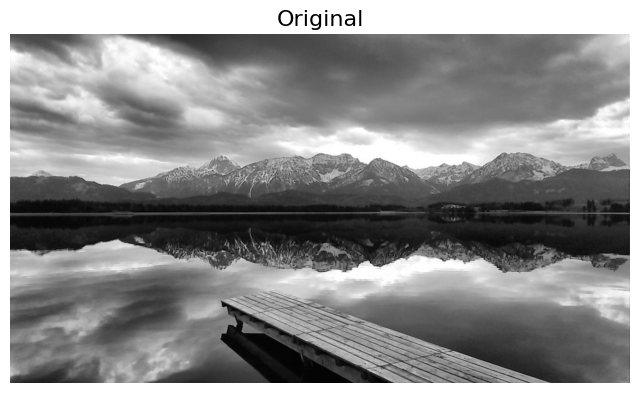

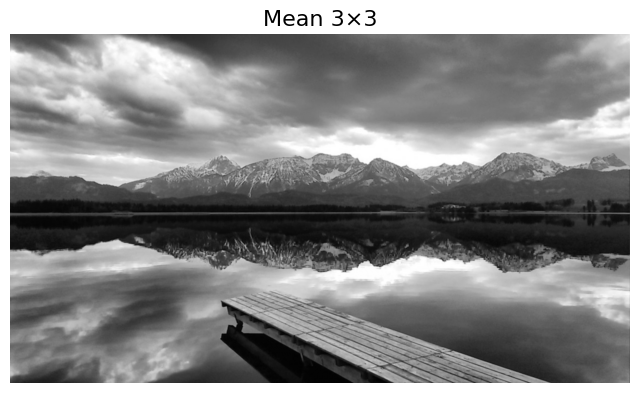

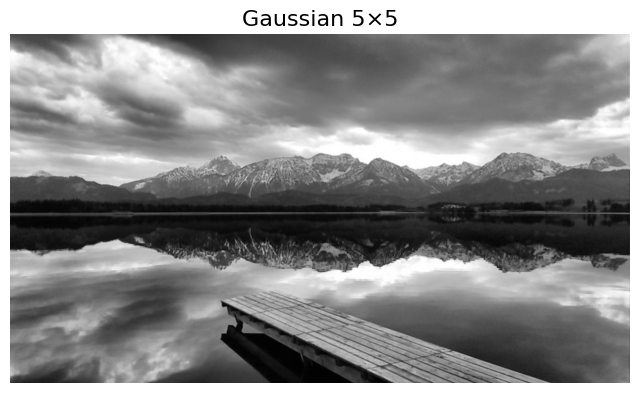

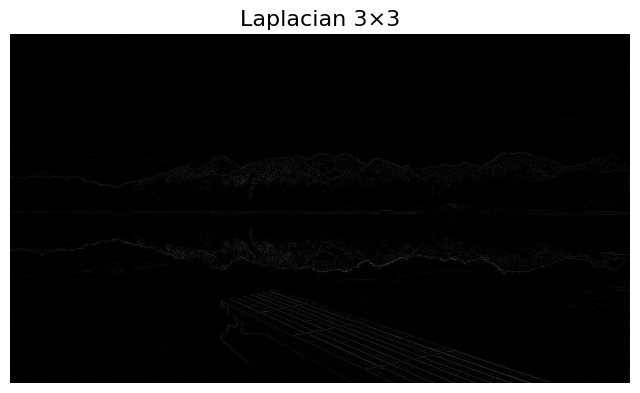

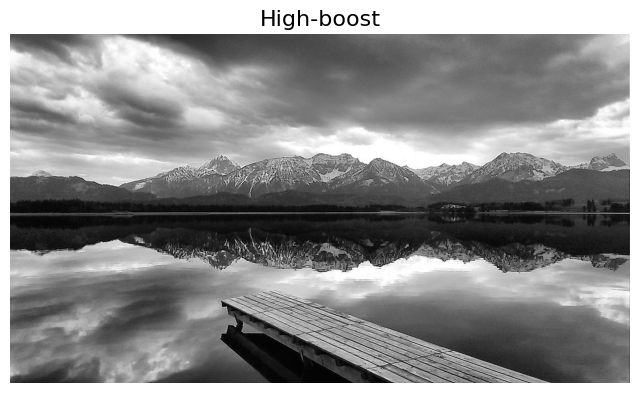

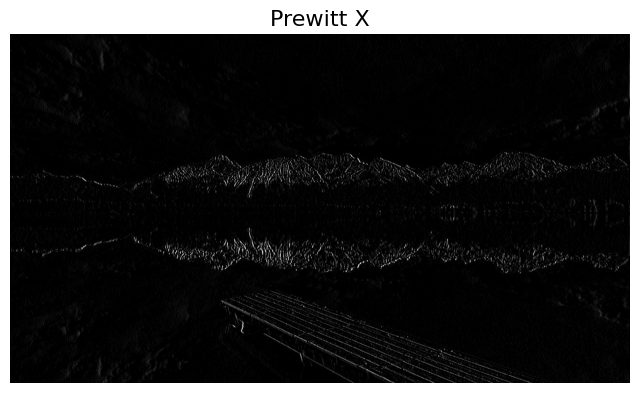

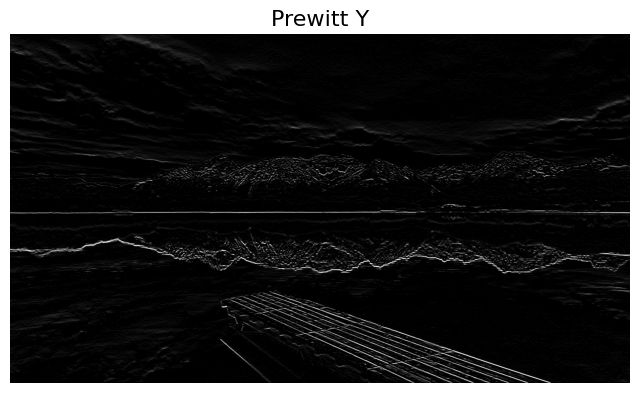

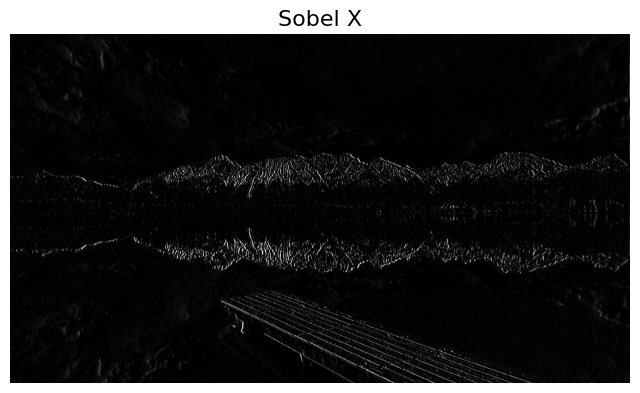

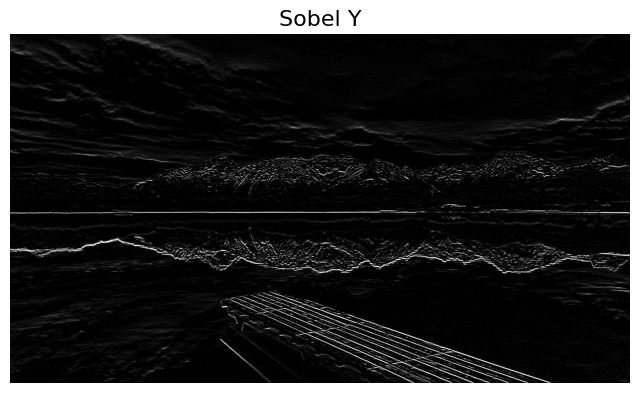

In [8]:
# 5. Standalone display of each filter output
for title, out in results.items():
    plt.figure(figsize=(8, 8))
    plt.imshow(out, cmap='gray')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()
